In [553]:
import socket
import struct
import time
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

In [554]:
g = np.genfromtxt("../data/G-1.csv", dtype=np.float32, delimiter=",")

In [555]:
print(g[10000], g[10001])

-1.742987e-07 3.978862e-07


In [556]:
struct.pack("i", g.size)

b'\x80\xc6\x00\x00'

In [557]:
def connect(a):
    elapsed = time.perf_counter()
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
        sock.connect(("localhost", 3333))
        sock.sendall(g.tobytes())
        f = sock.recv(3600*4, socket.MSG_WAITALL)
        sock.close()
    elapsed = time.perf_counter() - elapsed
    print(f"Completed Execution in {elapsed} seconds")
    return elapsed

In [558]:
def testThreads(num):
    threads = []
    pool = multiprocessing.Pool()
    elapsed = max(pool.map(connect, range(num)))
    print(f"Max: {elapsed} seconds")
    return elapsed
    #ps = [];
    #for i in range(0, threads):
    #    p = Process(target=connect)
    #    p.start()
    #   ps.append(p)

    #for p in ps:
    #    p.join()

testThreads(3)

Completed Execution in 12.080699548998382 seconds
Completed Execution in 12.206295324009261 seconds
Completed Execution in 12.73581872700015 seconds
Max: 12.73581872700015 seconds


12.73581872700015

In [559]:
r = []

for i in range(12):
    r.append(testThreads(i+1))

Completed Execution in 6.455599408989656 seconds
Max: 6.455599408989656 seconds
Completed Execution in 8.422789071992156 seconds
Completed Execution in 9.05520266899839 seconds
Max: 9.05520266899839 seconds
Completed Execution in 10.276563028004603 seconds
Completed Execution in 10.310845592000987 seconds
Completed Execution in 10.520604932011338 seconds
Max: 10.520604932011338 seconds
Completed Execution in 15.119910882000113 seconds
Completed Execution in 15.125692561006872 seconds
Completed Execution in 15.666509847011184 seconds
Completed Execution in 15.700303767996957 seconds
Max: 15.700303767996957 seconds
Completed Execution in 16.946700450003846 seconds
Completed Execution in 17.579539415004547 seconds
Completed Execution in 18.05132211500313 seconds
Completed Execution in 18.40737498398812 seconds
Completed Execution in 18.494824909997988 seconds
Max: 18.494824909997988 seconds
Completed Execution in 18.84034067200264 seconds
Completed Execution in 20.03358012800163 seconds
C

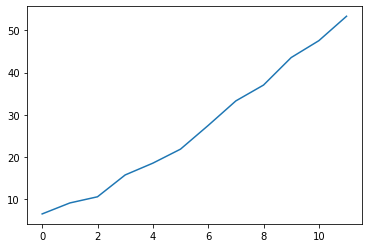

In [560]:
plt.plot(range(12), r)

In [561]:
len(f)

14400

In [562]:
img = np.frombuffer(f, dtype=np.float32)

In [563]:
def view(img):
    i = img.reshape(60, 60).transpose()
    return plt.imshow(i, "gray")

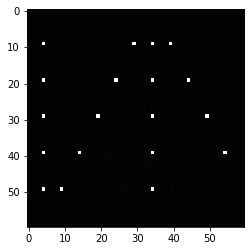

In [564]:
view(img)